# TF Low-Level API  Linear Regression

### 선형회귀 알고리즘
* Regression toward the mean(Francis Galton, 1822~1911)
* 샘플 데이타를 가장 잘 대표하는 직선의 방정식
    * $y = ax + b$
    * $a$ : 기울기
    * $b$ : 절편
* Hypothesis
    * $H(x) = W_x + b$
        * $H(x)$ : Hypothtesis
        * $W$ : Weight
        * $b$ : bias
 
![image.png](https://i.imgur.com/ZMivez8.png)	

### Linear Regression 개념 정리
* Linear Regression을 Numpy 만으로 구현해 본다.
* 단순화 하기 위해서 Weight 계수 1개만으로 제한 

### 샘플 데이타 생성
* m개의 샘플 데이타를 만든다.
* X 데이타 : np.arange(m) 
    * 0 ~ m
* y 데이타 : X * 2

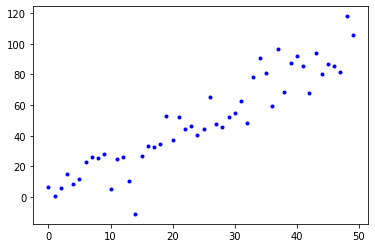

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf


m = 50 #sample count
TRUE_W = 2

X = tf.constant(range(m), tf.float32)
Y = X  * TRUE_W + 0 # W = 2, b=0(bias 생략)
Y = Y + tf.random.normal((50,)) * 10 # Noise 추가 

plt.plot(X, y, 'b.')

#### 선형 회귀 표시
* 데이타의 선회 회귀를 직선으로 표시
* 최종적으로 이 선을 만족하는 W를 찾으면 성공

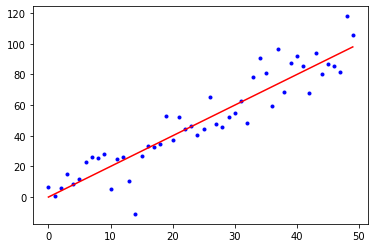

In [4]:
plt.plot(X, y, 'b.')
plt.plot(X, X*TRUE_W, 'r')

### Hypothesis의 W의 변화와 Cost 의 관계
* Hypothesis(가설)
    * $H(W) = Wx^{(i)} + b$
* Cost함수는 MSE(Mean Square Error, 평균 제곱 오차법)를 사용한다.
    * $\text{cost}(W) = \frac{1}{m}\displaystyle\sum_{i=1}^m(H(x^{(i)}) - y^{(i)})^2$
* W 값을 0.1 ~ 4.0까지 0.1씩 증가 하면서 cost를 구해서 시각화한다.
    * $W$의 변화에 따라 Cost의 변화량을 시각화해 보면 MSE 함수는 Convex 함수임을 알 수 있다.

### 관련 TF API
* tf.sqaure() : 제곱
    * tf.sqaure(3) : 9
* tf.reduce_mean() :차원을 줄이면서 평균 계산
    * tf.reduce_mean([1,2,3,4]) => 2.5
* tf.reduce_sum() : 차원을 줄이면서 합 계산
    * tf.reduce_sum([1,2,3,4,5]) : 15

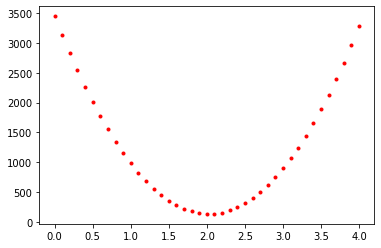

In [5]:

w_range = tf.constant(np.arange(0, 4.1, 0.1), tf.float32) #[i/10 for i in range(0,41)]
costs = []
for i, w in enumerate(w_range):
    h = w*X
    #cost = 1/m * np.sum( (h - y)**2)
    loss = h - y
    sqr_err = tf.square(loss)
    cost = tf.reduce_mean(sqr_err)
    costs = np.append(costs, cost)
    #plt.plot(w, cost, 'r.')
plt.plot(w_range, costs, 'r.')

### Cost 함수와 Gradient

* Cost 함수가 Convex 함수이기 때문에 최소값을 찾으려면 기울기를 따라 내려가면 된다.
* 미분을 하면 기울기를 얻을 수 있다.
    * $\displaystyle\frac{\partial}{\partial W}cost(W) = \frac{2}{m}\sum_{i=1}^m(H(W) -y^{(i)})x^{(i)}$
* 미분한 결과를 Cost 함수의 변화에 시각화하면 다음과 같다.
* 미분한 결과를 일정한 값(learning_rate)의 비율로 W에서 빼는 것을 반복하다 보면 cost가 가장 작은 W를 찾을 수 있다


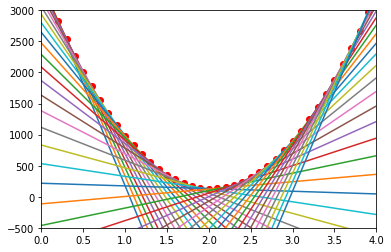

In [7]:
plt.plot(w_range, costs, 'ro')

for w, cost in zip(w_range, costs):
    with tf.GradientTape() as tape:
        tape.watch(w)
        h = w*X
        #gradient =  2/m * np.sum( (h-y) * X)
        loss = h - y
        sqr_err = tf.square(loss)
        cost = tf.reduce_mean(sqr_err)
        gradient = tape.gradient(cost, w)
        #print("w:{},\tcost:{},\tgradient:{}".format(w, cost, gradient))
        #plt.plot(w_range, gradient *w_range + cost)
        plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
        plt.axis([0, 4, -500, 3000])


### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

0, cost:5987.458984375, W:-0.24497652053833008
20, cost:85.03886413574219, W:1.9544683694839478
40, cost:79.94544219970703, W:2.0190787315368652
60, cost:79.94104766845703, W:2.0209767818450928
80, cost:79.9410400390625, W:2.0210325717926025


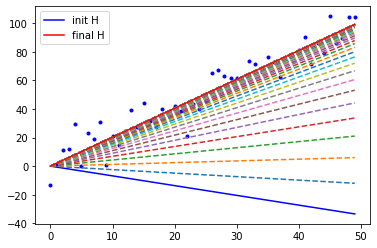

In [8]:
plt.plot(X, Y, 'b.')

W = tf.Variable(tf.random.normal(()))
plt.plot(X, W*X, 'b', label="init H")

for i in range(100):
    with tf.GradientTape() as tape:
        h = W*X
        cost = tf.reduce_mean(tf.square(h-Y))
    grad = tape.gradient(cost, W)
    W.assign(W - grad*0.0001)
    plt.plot(X, W*X, '--')
    if i%20 == 0:
        print(f"{i}, cost:{cost.numpy()}, W:{W.numpy()}")
plt.plot(X, W*X, 'r-', label="final H")
plt.legend()

### Optimizer

initial W [-1.1012203]
epoch: 0  cost: 7816.8057  dW: 3252.3198  W: [-0.8514026]
epoch: 20  cost: 362.57626  dW: 3252.3198  W: [1.4625837]
epoch: 40  cost: 106.80102  dW: 3252.3198  W: [1.8912199]
epoch: 60  cost: 98.024666  dW: 3252.3198  W: [1.9706191]
epoch: 80  cost: 97.72354  dW: 3252.3198  W: [1.9853266]
epoch: 100  cost: 97.7132  dW: 3252.3198  W: [1.988051]
epoch: 120  cost: 97.71286  dW: 3252.3198  W: [1.9885558]
epoch: 140  cost: 97.71285  dW: 3252.3198  W: [1.9886492]
epoch: 160  cost: 97.71285  dW: 3252.3198  W: [1.9886664]
epoch: 180  cost: 97.712845  dW: 3252.3198  W: [1.9886698]
suspended: 181
Final W: [1.9886698]


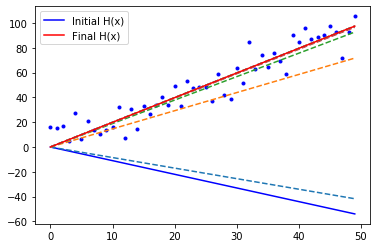

In [13]:
tf.random.set_seed(1)

plt.plot(X, y, 'b.')

W = tf.Variable(tf.random.normal([1]))
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W.numpy())

learning_rate = 0.00005
suspend = 0.00001
old_dW = None
epochs = 1000
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        hypothesis = W * X 
        loss = hypothesis - y
        cost = tf.reduce_mean(tf.square(loss))
        #cost = 1/m * np.sum(loss**2)
        dW = tape.gradient(cost, W)
        #dW=  2/m * np.sum(loss * X)
        if old_dW is not None and abs(dW - old_dW) < suspend:
            print('suspended:', epoch)
            break
        old_dW = dW
        # W.assign(W - learning_rate * dW)
        optimizer.apply_gradients(grads_and_vars=zip([dW], [W]))
        #W.assign_sub(learning_rate * dW)
        if epoch %20 == 0:
            print('epoch:',epoch,' cost:',cost.numpy(),' dW:',gradient.numpy(), ' W:', W.numpy())
            plt.plot(X, W*X, '--')
print('Final W:', W.numpy())
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()